# Introduction to Queryverse

Youtube clip
"https://www.youtube.com/watch?v=OFPNph-WxLM"

In [1]:
#using Pkg

In [2]:
#=
Pkg.add("VegaDatasets")
Pkg.build("PyCall")
Pkg.add("VegaLite")
Pkg.build("NodeJS")
Pkg.build("VegaLite")
=#

In [129]:
using Queryverse, VegaDatasets, IndexedTables, Statistics

In [4]:
cars = dataset("cars")

406x9 Vega dataset
Name                      │ Miles_per_Gallon │ Cylinders │ Displacement
──────────────────────────┼──────────────────┼───────────┼─────────────
chevrolet chevelle malibu │ 18.0             │ 8         │ 307.0       
buick skylark 320         │ 15.0             │ 8         │ 350.0       
plymouth satellite        │ 18.0             │ 8         │ 318.0       
amc rebel sst             │ 16.0             │ 8         │ 304.0       
ford torino               │ 17.0             │ 8         │ 302.0       
ford galaxie 500          │ 15.0             │ 8         │ 429.0       
chevrolet impala          │ 14.0             │ 8         │ 454.0       
plymouth fury iii         │ 14.0             │ 8         │ 440.0       
pontiac catalina          │ 14.0             │ 8         │ 455.0       
amc ambassador dpl        │ 15.0             │ 8         │ 390.0       
... with 396 more rows, and 5 more columns: Horsepower, Weight_in_lbs, Acceleration, Year, Origin

In [5]:
cars |>Voyager()

Voyager(Electron.Window(Application(Base.PipeEndpoint(RawFD(0x0000003b) paused, 0 bytes waiting), Process(`/Users/taisei/.julia/artifacts/8dcb05674719648a37669520bc9a6ef8773032f2/Julia.app/Contents/MacOS/Julia /Users/taisei/.julia/packages/Electron/MNI24/src/main.js /var/folders/xl/4ggvjmlj02b_hjhck0z8f_zh0000gn/T/jlel-eb528992cec011ea2a418dfa1c37a619 /var/folders/xl/4ggvjmlj02b_hjhck0z8f_zh0000gn/T/jlel-sn-eb52a6a4cec011ea0d1723e0d18f4f79 XrcTHxutA515S2RphUKh8UOMwncRB4kUND2lU16m4YVCkxjAGsrA5JQsgxr6tDc1PHqCdwojCnXgB5XEnfXTbRl+7gQdrM9g6/GYvu8nSLmXH0w/5YQmQligToGJSnBiKXjpre6G4GDi9uwROxtr8mKjxjff+FLAyeZVLIUD4ek=`, ProcessRunning), [1 window]), 1, true, Channel{Any}(sz_max:128,sz_curr:0)))

In [6]:
cars |>
@filter(_.Origin=="USA")|>
save("us_cars.csv")

In [7]:
load("us_cars.csv")

254x9 CSV file
Name                      │ Miles_per_Gallon │ Cylinders │ Displacement
──────────────────────────┼──────────────────┼───────────┼─────────────
chevrolet chevelle malibu │ 18.0             │ 8         │ 307.0       
buick skylark 320         │ 15.0             │ 8         │ 350.0       
plymouth satellite        │ 18.0             │ 8         │ 318.0       
amc rebel sst             │ 16.0             │ 8         │ 304.0       
ford torino               │ 17.0             │ 8         │ 302.0       
ford galaxie 500          │ 15.0             │ 8         │ 429.0       
chevrolet impala          │ 14.0             │ 8         │ 454.0       
plymouth fury iii         │ 14.0             │ 8         │ 440.0       
pontiac catalina          │ 14.0             │ 8         │ 455.0       
amc ambassador dpl        │ 15.0             │ 8         │ 390.0       
... with 244 more rows, and 5 more columns: Horsepower, Weight_in_lbs, Acceleration, Year, Origin

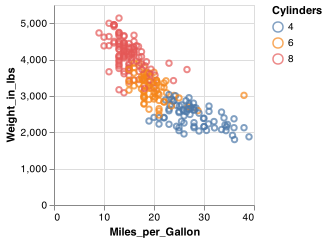

In [8]:
load("us_cars.csv") |>
@vlplot(:point,x=:Miles_per_Gallon,y=:Weight_in_lbs,color="Cylinders:n")

## File IO

### Load

`load(filename,[args]:[kwargs])`

In [9]:
load("us_cars.csv")

254x9 CSV file
Name                      │ Miles_per_Gallon │ Cylinders │ Displacement
──────────────────────────┼──────────────────┼───────────┼─────────────
chevrolet chevelle malibu │ 18.0             │ 8         │ 307.0       
buick skylark 320         │ 15.0             │ 8         │ 350.0       
plymouth satellite        │ 18.0             │ 8         │ 318.0       
amc rebel sst             │ 16.0             │ 8         │ 304.0       
ford torino               │ 17.0             │ 8         │ 302.0       
ford galaxie 500          │ 15.0             │ 8         │ 429.0       
chevrolet impala          │ 14.0             │ 8         │ 454.0       
plymouth fury iii         │ 14.0             │ 8         │ 440.0       
pontiac catalina          │ 14.0             │ 8         │ 455.0       
amc ambassador dpl        │ 15.0             │ 8         │ 390.0       
... with 244 more rows, and 5 more columns: Horsepower, Weight_in_lbs, Acceleration, Year, Origin

`load("cars.xlsx","cars")`
The second argument specifies the name of sheet

`load("data.cars.xlsx","cars!C1:G14")`

### Save the tabular file 

`save(filename,tablename,[args];[kwargs])`

In [10]:
cars

406x9 Vega dataset
Name                      │ Miles_per_Gallon │ Cylinders │ Displacement
──────────────────────────┼──────────────────┼───────────┼─────────────
chevrolet chevelle malibu │ 18.0             │ 8         │ 307.0       
buick skylark 320         │ 15.0             │ 8         │ 350.0       
plymouth satellite        │ 18.0             │ 8         │ 318.0       
amc rebel sst             │ 16.0             │ 8         │ 304.0       
ford torino               │ 17.0             │ 8         │ 302.0       
ford galaxie 500          │ 15.0             │ 8         │ 429.0       
chevrolet impala          │ 14.0             │ 8         │ 454.0       
plymouth fury iii         │ 14.0             │ 8         │ 440.0       
pontiac catalina          │ 14.0             │ 8         │ 455.0       
amc ambassador dpl        │ 15.0             │ 8         │ 390.0       
... with 396 more rows, and 5 more columns: Horsepower, Weight_in_lbs, Acceleration, Year, Origin

In [11]:
save("cars1.csv",cars)

In [12]:
cars |> save("cars2.csv")

In [13]:
cars |> save("cars3.csv",delim=';')

## Tables

In [14]:
typeof(cars)

VegaDatasets.VegaDataset

The interface is very minimal: Iterator of named tuples.

In [15]:
load("cars.csv") |> typeof

CSVFiles.CSVFile

In [16]:
load("cars1.csv") |>DataFrame

406×9 DataFrame. Omitted printing of 6 columns
│ Row │ Name                              │ Miles_per_Gallon │ Cylinders │
│     │ String                            │ Float64?         │ Int64     │
├─────┼───────────────────────────────────┼──────────────────┼───────────┤
│ 1   │ chevrolet chevelle malibu         │ 18.0             │ 8         │
│ 2   │ buick skylark 320                 │ 15.0             │ 8         │
│ 3   │ plymouth satellite                │ 18.0             │ 8         │
│ 4   │ amc rebel sst                     │ 16.0             │ 8         │
│ 5   │ ford torino                       │ 17.0             │ 8         │
│ 6   │ ford galaxie 500                  │ 15.0             │ 8         │
│ 7   │ chevrolet impala                  │ 14.0             │ 8         │
│ 8   │ plymouth fury iii                 │ 14.0             │ 8         │
│ 9   │ pontiac catalina                  │ 14.0             │ 8         │
│ 10  │ amc ambassador dpl                │ 15.0             │ 8         │
⋮
│ 396 │ oldsmobile cutlass ciera (diesel) │ 38.0             │ 6         │
│ 397 │ chrysler lebaron medallion        │ 26.0             │ 4         │
│ 398 │ ford granada l                    │ 22.0             │ 6         │
│ 399 │ toyota celica gt                  │ 32.0             │ 4         │
│ 400 │ dodge charger 2.2                 │ 36.0             │ 4         │
│ 401 │ chevrolet camaro                  │ 27.0             │ 4         │
│ 402 │ ford mustang gl                   │ 27.0             │ 4         │
│ 403 │ vw pickup                         │ 44.0             │ 4         │
│ 404 │ dodge rampage                     │ 32.0             │ 4         │
│ 405 │ ford ranger                       │ 28.0             │ 4         │
│ 406 │ chevy s-10                        │ 31.0             │ 4         │

In [17]:
#index table
load("cars1.csv") |> table

Table with 406 rows, 9 columns:
Columns:
#  colname           type
────────────────────────────────────────────
1  Name              String
2  Miles_per_Gallon  Union{Missing, Float64}
3  Cylinders         Int64
4  Displacement      Float64
5  Horsepower        Union{Missing, Int64}
6  Weight_in_lbs     Int64
7  Acceleration      Float64
8  Year              Date
9  Origin            String

In [18]:
it = load("cars1.csv") |> table

Table with 406 rows, 9 columns:
Columns:
#  colname           type
────────────────────────────────────────────
1  Name              String
2  Miles_per_Gallon  Union{Missing, Float64}
3  Cylinders         Int64
4  Displacement      Float64
5  Horsepower        Union{Missing, Int64}
6  Weight_in_lbs     Int64
7  Acceleration      Float64
8  Year              Date
9  Origin            String

In [19]:
df = it |> DataFrame

406×9 DataFrame. Omitted printing of 6 columns
│ Row │ Name                              │ Miles_per_Gallon │ Cylinders │
│     │ String                            │ Float64?         │ Int64     │
├─────┼───────────────────────────────────┼──────────────────┼───────────┤
│ 1   │ chevrolet chevelle malibu         │ 18.0             │ 8         │
│ 2   │ buick skylark 320                 │ 15.0             │ 8         │
│ 3   │ plymouth satellite                │ 18.0             │ 8         │
│ 4   │ amc rebel sst                     │ 16.0             │ 8         │
│ 5   │ ford torino                       │ 17.0             │ 8         │
│ 6   │ ford galaxie 500                  │ 15.0             │ 8         │
│ 7   │ chevrolet impala                  │ 14.0             │ 8         │
│ 8   │ plymouth fury iii                 │ 14.0             │ 8         │
│ 9   │ pontiac catalina                  │ 14.0             │ 8         │
│ 10  │ amc ambassador dpl                │ 15.0             │ 8         │
⋮
│ 396 │ oldsmobile cutlass ciera (diesel) │ 38.0             │ 6         │
│ 397 │ chrysler lebaron medallion        │ 26.0             │ 4         │
│ 398 │ ford granada l                    │ 22.0             │ 6         │
│ 399 │ toyota celica gt                  │ 32.0             │ 4         │
│ 400 │ dodge charger 2.2                 │ 36.0             │ 4         │
│ 401 │ chevrolet camaro                  │ 27.0             │ 4         │
│ 402 │ ford mustang gl                   │ 27.0             │ 4         │
│ 403 │ vw pickup                         │ 44.0             │ 4         │
│ 404 │ dodge rampage                     │ 32.0             │ 4         │
│ 405 │ ford ranger                       │ 28.0             │ 4         │
│ 406 │ chevy s-10                        │ 31.0             │ 4         │

In [20]:
it |> Voyager()

Voyager(Electron.Window(Application(Base.PipeEndpoint(RawFD(0x0000003b) paused, 0 bytes waiting), Process(`/Users/taisei/.julia/artifacts/8dcb05674719648a37669520bc9a6ef8773032f2/Julia.app/Contents/MacOS/Julia /Users/taisei/.julia/packages/Electron/MNI24/src/main.js /var/folders/xl/4ggvjmlj02b_hjhck0z8f_zh0000gn/T/jlel-eb528992cec011ea2a418dfa1c37a619 /var/folders/xl/4ggvjmlj02b_hjhck0z8f_zh0000gn/T/jlel-sn-eb52a6a4cec011ea0d1723e0d18f4f79 XrcTHxutA515S2RphUKh8UOMwncRB4kUND2lU16m4YVCkxjAGsrA5JQsgxr6tDc1PHqCdwojCnXgB5XEnfXTbRl+7gQdrM9g6/GYvu8nSLmXH0w/5YQmQligToGJSnBiKXjpre6G4GDi9uwROxtr8mKjxjff+FLAyeZVLIUD4ek=`, ProcessRunning), [2 windows]), 2, true, Channel{Any}(sz_max:128,sz_curr:0)))

Data type does not matter

~57.09

## The Pipe

In [23]:
load("cars1.csv") |> @filter(_.Origin=="Europe") |> DataFrame 

73×9 DataFrame. Omitted printing of 6 columns
│ Row │ Name                         │ Miles_per_Gallon │ Cylinders │
│     │ String                       │ Float64?         │ Int64     │
├─────┼──────────────────────────────┼──────────────────┼───────────┤
│ 1   │ citroen ds-21 pallas         │ missing          │ 4         │
│ 2   │ volkswagen 1131 deluxe sedan │ 26.0             │ 4         │
│ 3   │ peugeot 504                  │ 25.0             │ 4         │
│ 4   │ audi 100 ls                  │ 24.0             │ 4         │
│ 5   │ saab 99e                     │ 25.0             │ 4         │
│ 6   │ bmw 2002                     │ 26.0             │ 4         │
│ 7   │ volkswagen super beetle 117  │ missing          │ 4         │
│ 8   │ opel 1900                    │ 28.0             │ 4         │
│ 9   │ peugeot 304                  │ 30.0             │ 4         │
│ 10  │ fiat 124b                    │ 30.0             │ 4         │
⋮
│ 63  │ mercedes-benz 240d           │ 30.0             │ 4         │
│ 64  │ renault lecar deluxe         │ 40.9             │ 4         │
│ 65  │ vokswagen rabbit             │ 29.8             │ 4         │
│ 66  │ triumph tr7 coupe            │ 35.0             │ 4         │
│ 67  │ volkswagen jetta             │ 33.0             │ 4         │
│ 68  │ renault 18i                  │ 34.5             │ 4         │
│ 69  │ peugeot 505s turbo diesel    │ 28.1             │ 4         │
│ 70  │ saab 900s                    │ missing          │ 4         │
│ 71  │ volvo diesel                 │ 30.7             │ 6         │
│ 72  │ volkswagen rabbit l          │ 36.0             │ 4         │
│ 73  │ vw pickup                    │ 44.0             │ 4         │

In [26]:
load("cars1.csv") |>
    @filter(_.Origin=="Europe") |>
    save("cars10.csv")

`source|>@tee(step1)|>step2`:source => step1 AND source =>step2

In [27]:
load("cars1.csv") |>
    @filter(_.Origin=="Europe") |>
    @tee(save("cars10.csv"))

?x9 query result
Name                         │ Miles_per_Gallon │ Cylinders │ Displacement
─────────────────────────────┼──────────────────┼───────────┼─────────────
citroen ds-21 pallas         │ #NA              │ 4         │ 133.0       
volkswagen 1131 deluxe sedan │ 26.0             │ 4         │ 97.0        
peugeot 504                  │ 25.0             │ 4         │ 110.0       
audi 100 ls                  │ 24.0             │ 4         │ 107.0       
saab 99e                     │ 25.0             │ 4         │ 104.0       
bmw 2002                     │ 26.0             │ 4         │ 121.0       
volkswagen super beetle 117  │ #NA              │ 4         │ 97.0        
opel 1900                    │ 28.0             │ 4         │ 116.0       
peugeot 304                  │ 30.0             │ 4         │ 79.0        
fiat 124b                    │ 30.0             │ 4         │ 88.0        
... with more rows, and 5 more columns: Horsepower, Weight_in_lbs, Acceleration, Year, Origin

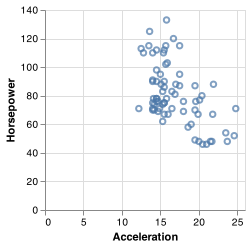

In [29]:
load("cars1.csv") |>
    @filter(_.Origin=="Europe") |>
    @tee(save("cars10.csv"))|>
    @vlplot(:point,x=:Acceleration, y=:Horsepower)|>
    @tee(save("fig1.png"))|>
    @tee(save("fig1.pdf"))

## Queries :manipulate the data

`load("data) |>
@filter(_.Origin=="EU") |>
@orderby(_.MPG)`

In [32]:
load("cars1.csv") |>
@filter(_.Origin=="Europe") |>
@orderby(_.Horsepower)

?x9 query result
Name                            │ Miles_per_Gallon │ Cylinders │ Displacement
────────────────────────────────┼──────────────────┼───────────┼─────────────
volkswagen 1131 deluxe sedan    │ 26.0             │ 4         │ 97.0        
volkswagen super beetle         │ 26.0             │ 4         │ 97.0        
volkswagen super beetle 117     │ #NA              │ 4         │ 97.0        
volkswagen rabbit custom diesel │ 43.1             │ 4         │ 90.0        
vw rabbit c (diesel)            │ 44.3             │ 4         │ 90.0        
vw dasher (diesel)              │ 43.4             │ 4         │ 90.0        
fiat 128                        │ 29.0             │ 4         │ 68.0        
vw pickup                       │ 44.0             │ 4         │ 97.0        
volkswagen type 3               │ 23.0             │ 4         │ 97.0        
renault 5 gtl                   │ 36.0             │ 4         │ 79.0        
... with more rows, and 5 more columns: Horsepower, Weight_in_lbs, Acceleration, Year, Origin

In [34]:
1:8 |>
@filter(_%2==0) |>
@orderby_descending(_)

?-element query result
 8
 6
 4
 2

`collect` => transform into array

In [35]:
1:8 |>
@filter(_%2==0) |>
@orderby_descending(_) |>
collect

4-element Array{Int64,1}:
 8
 6
 4
 2

In [36]:
Dict(:a=>4,:b=>2,:c=>8)

Dict{Symbol,Int64} with 3 entries:
  :a => 4
  :b => 2
  :c => 8

In [37]:
Dict(:a=>4,:b=>2,:c=>8) |>
@filter(_[2]>3)

?-element query result
 :a=>4
 :c=>8

In [38]:
Dict(:a=>4,:b=>2,:c=>8) |>
@filter(_[2]>3) |>
collect

2-element Array{Pair{Symbol,Int64},1}:
 :a => 4
 :c => 8

In [39]:
Dict(:a=>4,:b=>2,:c=>8) |>
@filter(_[2]>3) |>
Dict

Dict{Symbol,Int64} with 2 entries:
  :a => 4
  :c => 8

### `@filter`

In [40]:
1:10 |>
@filter(_>5)

?-element query result
 6
 7
 8
 9
 10

`_` :Anonymous function

In [42]:
1:10 |>

@filter(i->i>5)

?-element query result
 6
 7
 8
 9
 10

### `@map`

In [43]:
1:10 |>
@map(_^2)

10-element query result
 1
 4
 9
 16
 25
 36
 49
 64
 81
 100

In [45]:
1:10 |>
@map(_=>_^2) |> #same with @map(i -> i=i^2)
Dict 

Dict{Int64,Int64} with 10 entries:
  7  => 49
  4  => 16
  9  => 81
  10 => 100
  2  => 4
  3  => 9
  5  => 25
  8  => 64
  6  => 36
  1  => 1

In [46]:
cars

406x9 Vega dataset
Name                      │ Miles_per_Gallon │ Cylinders │ Displacement
──────────────────────────┼──────────────────┼───────────┼─────────────
chevrolet chevelle malibu │ 18.0             │ 8         │ 307.0       
buick skylark 320         │ 15.0             │ 8         │ 350.0       
plymouth satellite        │ 18.0             │ 8         │ 318.0       
amc rebel sst             │ 16.0             │ 8         │ 304.0       
ford torino               │ 17.0             │ 8         │ 302.0       
ford galaxie 500          │ 15.0             │ 8         │ 429.0       
chevrolet impala          │ 14.0             │ 8         │ 454.0       
plymouth fury iii         │ 14.0             │ 8         │ 440.0       
pontiac catalina          │ 14.0             │ 8         │ 455.0       
amc ambassador dpl        │ 15.0             │ 8         │ 390.0       
... with 396 more rows, and 5 more columns: Horsepower, Weight_in_lbs, Acceleration, Year, Origin

In [47]:
cars |>
@map(_.Origin)

406-element query result
 "USA"
 "USA"
 "USA"
 "USA"
 "USA"
 "USA"
 "USA"
 "USA"
 "USA"
 "USA"
... with 396 more elements

In [48]:
r = cars |>
collect

406-element Array{NamedTuple{(:Name, :Miles_per_Gallon, :Cylinders, :Displacement, :Horsepower, :Weight_in_lbs, :Acceleration, :Year, :Origin),Tuple{String,DataValue{Float64},Int64,Float64,DataValue{Int64},Int64,Float64,String,String}},1}:
 (Name = "chevrolet chevelle malibu", Miles_per_Gallon = DataValue{Float64}(18.0), Cylinders = 8, Displacement = 307.0, Horsepower = DataValue{Int64}(130), Weight_in_lbs = 3504, Acceleration = 12.0, Year = "1970-01-01", Origin = "USA")
 (Name = "buick skylark 320", Miles_per_Gallon = DataValue{Float64}(15.0), Cylinders = 8, Displacement = 350.0, Horsepower = DataValue{Int64}(165), Weight_in_lbs = 3693, Acceleration = 11.5, Year = "1970-01-01", Origin = "USA")
 (Name = "plymouth satellite", Miles_per_Gallon = DataValue{Float64}(18.0), Cylinders = 8, Displacement = 318.0, Horsepower = DataValue{Int64}(150), Weight_in_lbs = 3436, Acceleration = 11.0, Year = "1970-01-01", Origin = "USA")
 (Name = "amc rebel sst", Miles_per_Gallon = DataValue{Float64}(16.

In [49]:
nt = r[1]

(Name = "chevrolet chevelle malibu", Miles_per_Gallon = DataValue{Float64}(18.0), Cylinders = 8, Displacement = 307.0, Horsepower = DataValue{Int64}(130), Weight_in_lbs = 3504, Acceleration = 12.0, Year = "1970-01-01", Origin = "USA")

In [50]:
typeof(nt)

NamedTuple{(:Name, :Miles_per_Gallon, :Cylinders, :Displacement, :Horsepower, :Weight_in_lbs, :Acceleration, :Year, :Origin),Tuple{String,DataValue{Float64},Int64,Float64,DataValue{Int64},Int64,Float64,String,String}}

In [132]:
fieldnames(nt)

MethodError: MethodError: no method matching fieldnames(::NamedTuple{(:Name, :Miles_per_Gallon, :Cylinders, :Displacement, :Horsepower, :Weight_in_lbs, :Acceleration, :Year, :Origin),Tuple{String,DataValue{Float64},Int64,Float64,DataValue{Int64},Int64,Float64,String,String}})
Closest candidates are:
  fieldnames(!Matched::Core.TypeofBottom) at reflection.jl:175
  fieldnames(!Matched::Type{#s6} where #s6<:Tuple) at reflection.jl:177
  fieldnames(!Matched::DataType) at reflection.jl:172
  ...

{fieldname1=value1,fieldname2=value2,...,}
{fieldname1=value1,value2,value3,..,}
{filedname1 = value1, _.foo}
#only works for queryverse

In [55]:
1:10 |>
@map({foo=_, bar=_^2})

10x2 query result
foo │ bar
────┼────
1   │ 1  
2   │ 4  
3   │ 9  
4   │ 16 
5   │ 25 
6   │ 36 
7   │ 49 
8   │ 64 
9   │ 81 
10  │ 100

In [56]:
cars

406x9 Vega dataset
Name                      │ Miles_per_Gallon │ Cylinders │ Displacement
──────────────────────────┼──────────────────┼───────────┼─────────────
chevrolet chevelle malibu │ 18.0             │ 8         │ 307.0       
buick skylark 320         │ 15.0             │ 8         │ 350.0       
plymouth satellite        │ 18.0             │ 8         │ 318.0       
amc rebel sst             │ 16.0             │ 8         │ 304.0       
ford torino               │ 17.0             │ 8         │ 302.0       
ford galaxie 500          │ 15.0             │ 8         │ 429.0       
chevrolet impala          │ 14.0             │ 8         │ 454.0       
plymouth fury iii         │ 14.0             │ 8         │ 440.0       
pontiac catalina          │ 14.0             │ 8         │ 455.0       
amc ambassador dpl        │ 15.0             │ 8         │ 390.0       
... with 396 more rows, and 5 more columns: Horsepower, Weight_in_lbs, Acceleration, Year, Origin

In [57]:
cars |>
@map({_.Name,_.Year})

406x2 query result
Name                      │ Year      
──────────────────────────┼───────────
chevrolet chevelle malibu │ 1970-01-01
buick skylark 320         │ 1970-01-01
plymouth satellite        │ 1970-01-01
amc rebel sst             │ 1970-01-01
ford torino               │ 1970-01-01
ford galaxie 500          │ 1970-01-01
chevrolet impala          │ 1970-01-01
plymouth fury iii         │ 1970-01-01
pontiac catalina          │ 1970-01-01
amc ambassador dpl        │ 1970-01-01
... with 396 more rows

In [59]:
cars |>
@map({_.Name,Foo=_.Year}) #rename

406x2 query result
Name                      │ Foo       
──────────────────────────┼───────────
chevrolet chevelle malibu │ 1970-01-01
buick skylark 320         │ 1970-01-01
plymouth satellite        │ 1970-01-01
amc rebel sst             │ 1970-01-01
ford torino               │ 1970-01-01
ford galaxie 500          │ 1970-01-01
chevrolet impala          │ 1970-01-01
plymouth fury iii         │ 1970-01-01
pontiac catalina          │ 1970-01-01
amc ambassador dpl        │ 1970-01-01
... with 396 more rows

In [60]:
cars |>
@map({_.Name,Foo=_.Year}) |>
save("cars11.csv")

In [66]:
cars |>
@map(_.Name => _.Year) |>
Dict

Dict{String,String} with 311 entries:
  "chevrolet citation"        => "1982-01-01"
  "plymouth 'cuda 340"        => "1970-01-01"
  "ford mustang boss 302"     => "1970-01-01"
  "ford mustang gl"           => "1982-01-01"
  "amc matador"               => "1976-01-01"
  "ford granada"              => "1977-01-01"
  "amc concord dl"            => "1982-01-01"
  "ford gran torino"          => "1976-01-01"
  "plymouth arrow gs"         => "1977-01-01"
  "chevrolet monte carlo"     => "1970-01-01"
  "buick estate wagon (sw)"   => "1979-01-01"
  "datsun 510"                => "1978-01-01"
  "mercedes benz 300d"        => "1979-01-01"
  "bmw 2002"                  => "1970-01-01"
  "buick century luxus (sw)"  => "1974-01-01"
  "peugeot 604sl"             => "1978-01-01"
  "dodge colt"                => "1980-01-01"
  "mercedes-benz 240d"        => "1980-01-01"
  "audi 4000"                 => "1980-01-01"
  "plymouth custom suburb"    => "1973-01-01"
  "datsun 310 gx"             => "1982-01-

### @take and @drop

In [72]:
1:10 |> @drop(3) |>@take(4)

4-element query result
 4
 5
 6
 7

### Sorting

In [74]:
cars |> @orderby(_.Origin)

406x9 query result
Name                         │ Miles_per_Gallon │ Cylinders │ Displacement
─────────────────────────────┼──────────────────┼───────────┼─────────────
citroen ds-21 pallas         │ #NA              │ 4         │ 133.0       
volkswagen 1131 deluxe sedan │ 26.0             │ 4         │ 97.0        
peugeot 504                  │ 25.0             │ 4         │ 110.0       
audi 100 ls                  │ 24.0             │ 4         │ 107.0       
saab 99e                     │ 25.0             │ 4         │ 104.0       
bmw 2002                     │ 26.0             │ 4         │ 121.0       
volkswagen super beetle 117  │ #NA              │ 4         │ 97.0        
opel 1900                    │ 28.0             │ 4         │ 116.0       
peugeot 304                  │ 30.0             │ 4         │ 79.0        
fiat 124b                    │ 30.0             │ 4         │ 88.0        
... with 396 more rows, and 5 more columns: Horsepower, Weight_in_lbs, Acceleration, Year, Origin

In [75]:
cars |> @orderby_descending(_.Origin)

406x9 query result
Name                      │ Miles_per_Gallon │ Cylinders │ Displacement
──────────────────────────┼──────────────────┼───────────┼─────────────
chevrolet chevelle malibu │ 18.0             │ 8         │ 307.0       
buick skylark 320         │ 15.0             │ 8         │ 350.0       
plymouth satellite        │ 18.0             │ 8         │ 318.0       
amc rebel sst             │ 16.0             │ 8         │ 304.0       
ford torino               │ 17.0             │ 8         │ 302.0       
ford galaxie 500          │ 15.0             │ 8         │ 429.0       
chevrolet impala          │ 14.0             │ 8         │ 454.0       
plymouth fury iii         │ 14.0             │ 8         │ 440.0       
pontiac catalina          │ 14.0             │ 8         │ 455.0       
amc ambassador dpl        │ 15.0             │ 8         │ 390.0       
... with 396 more rows, and 5 more columns: Horsepower, Weight_in_lbs, Acceleration, Year, Origin

In [78]:
cars |> @orderby(_.Origin)|> 
@thenby(_.Year)|> @thenby_descending(_.Horsepower)

?x9 query result
Name                         │ Miles_per_Gallon │ Cylinders │ Displacement
─────────────────────────────┼──────────────────┼───────────┼─────────────
citroen ds-21 pallas         │ #NA              │ 4         │ 133.0       
bmw 2002                     │ 26.0             │ 4         │ 121.0       
saab 99e                     │ 25.0             │ 4         │ 104.0       
audi 100 ls                  │ 24.0             │ 4         │ 107.0       
peugeot 504                  │ 25.0             │ 4         │ 110.0       
volkswagen 1131 deluxe sedan │ 26.0             │ 4         │ 97.0        
opel 1900                    │ 28.0             │ 4         │ 116.0       
fiat 124b                    │ 30.0             │ 4         │ 88.0        
peugeot 304                  │ 30.0             │ 4         │ 79.0        
volkswagen model 111         │ 27.0             │ 4         │ 97.0        
... with more rows, and 5 more columns: Horsepower, Weight_in_lbs, Acceleration, Year, Origin

In [80]:
cars |> @orderby(length(_.Origin)) #not restriced to variable names

406x9 query result
Name                      │ Miles_per_Gallon │ Cylinders │ Displacement
──────────────────────────┼──────────────────┼───────────┼─────────────
chevrolet chevelle malibu │ 18.0             │ 8         │ 307.0       
buick skylark 320         │ 15.0             │ 8         │ 350.0       
plymouth satellite        │ 18.0             │ 8         │ 318.0       
amc rebel sst             │ 16.0             │ 8         │ 304.0       
ford torino               │ 17.0             │ 8         │ 302.0       
ford galaxie 500          │ 15.0             │ 8         │ 429.0       
chevrolet impala          │ 14.0             │ 8         │ 454.0       
plymouth fury iii         │ 14.0             │ 8         │ 440.0       
pontiac catalina          │ 14.0             │ 8         │ 455.0       
amc ambassador dpl        │ 15.0             │ 8         │ 390.0       
... with 396 more rows, and 5 more columns: Horsepower, Weight_in_lbs, Acceleration, Year, Origin

### `@group`

`@groupby(_.Origin)`

In [81]:
cars |> @groupby(_.Origin)

?-element query result
 NamedTuple{(:Name, :Miles_per_Gallon, :Cylinders, :Displacement, :Horsepower, :Weight_in_lbs, :Acceleration, :Year, :Origin),Tuple{String,DataValue{Float64},Int64,Float64,DataValue{Int64},Int64,Float64,String,String}}[(Name = "chevrolet chevelle malibu", Miles_per_Gallon = 18.0, Cylinders = 8, Displacement = 307.0, Horsepower = 130, Weight_in_lbs = 3504, Acceleration = 12.0, Year = "1970-01-01", Origin = "USA"), (Name = "buick skylark 320", Miles_per_Gallon = 15.0, Cylinders = 8, Displacement = 350.0, Horsepower = 165, Weight_in_lbs = 3693, Acceleration = 11.5, Year = "1970-01-01", Origin = "USA"), (Name = "plymouth satellite", Miles_per_Gallon = 18.0, Cylinders = 8, Displacement = 318.0, Horsepower = 150, Weight_in_lbs = 3436, Acceleration = 11.0, Year = "1970-01-01", Origin = "USA"), (Name = "amc rebel sst", Miles_per_Gallon = 16.0, Cylinders = 8, Displacement = 304.0, Horsepower = 150, Weight_in_lbs = 3433, Acceleration = 12.0, Year = "1970-01-01", Origin = "

In [ ]:
 x = data |> @groupby(_.symbol) |> @map({ Symbol = key(_), Total=sum(_.price)})

* Note .key does not work. use key() instead.

In [124]:
cars |> @groupby(_.Origin) |> @map(key(_))

?-element query result
 "USA"
 "Europe"
 "Japan"

In [83]:
cars |> @groupby(_.Origin) |> @map(length(_))

?-element query result
 254
 73
 79

In [84]:
cars |> @groupby(_.Origin) |> @map(_[3])

3x9 query result
Name               │ Miles_per_Gallon │ Cylinders │ Displacement │ Horsepower
───────────────────┼──────────────────┼───────────┼──────────────┼───────────
plymouth satellite │ 18.0             │ 8         │ 318.0        │ 150       
peugeot 504        │ 25.0             │ 4         │ 110.0        │ 87        
datsun pl510       │ 27.0             │ 4         │ 97.0         │ 88        
... with 4 more columns: Weight_in_lbs, Acceleration, Year, Origin

In [125]:
cars |> @groupby(_.Origin) |> @map({Origin=key(_),Count=length(_)})

3x2 query result
Origin │ Count
───────┼──────
USA    │ 254  
Europe │ 73   
Japan  │ 79

### calculate group means

`@groupby(_.Origin,_.MPG)`

In [136]:
cars |>
    @groupby(_.Origin,_.Acceleration) |>
    @map({Origin=key(_), MeanAcceleration=mean(_)})

3x2 query result
Origin │ MeanAcceleration
───────┼─────────────────
USA    │ 14.9425         
Europe │ 16.8219         
Japan  │ 16.1722

 `x..y` is `i.y for i in x`
 
**NOTE**: It does not work.

# When is processing happening ?

In [92]:
q = load("cars1.csv") |>
    @filter(_.Origin=="USA") |>
    @map({_.Name,_.Cylinders}) |>
    @take(5);

Everything is lazy! (no data is loaded during operation)

In [96]:
load("cars1.csv") |>
@filter(_.Origin=="USA") |>
@map({_.Name,_.Cylinders}) |>
save("cars12.csv")

## Plotting

In [97]:
cars

406x9 Vega dataset
Name                      │ Miles_per_Gallon │ Cylinders │ Displacement
──────────────────────────┼──────────────────┼───────────┼─────────────
chevrolet chevelle malibu │ 18.0             │ 8         │ 307.0       
buick skylark 320         │ 15.0             │ 8         │ 350.0       
plymouth satellite        │ 18.0             │ 8         │ 318.0       
amc rebel sst             │ 16.0             │ 8         │ 304.0       
ford torino               │ 17.0             │ 8         │ 302.0       
ford galaxie 500          │ 15.0             │ 8         │ 429.0       
chevrolet impala          │ 14.0             │ 8         │ 454.0       
plymouth fury iii         │ 14.0             │ 8         │ 440.0       
pontiac catalina          │ 14.0             │ 8         │ 455.0       
amc ambassador dpl        │ 15.0             │ 8         │ 390.0       
... with 396 more rows, and 5 more columns: Horsepower, Weight_in_lbs, Acceleration, Year, Origin

In [98]:
cars |>
@vlplot(:point)

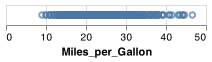

In [99]:
cars |>
@vlplot(:point, x=:Miles_per_Gallon)

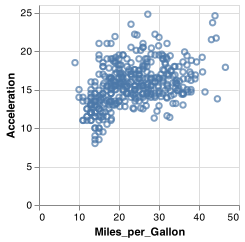

In [101]:
cars |>
@vlplot(:point, x=:Miles_per_Gallon, y=:Acceleration)

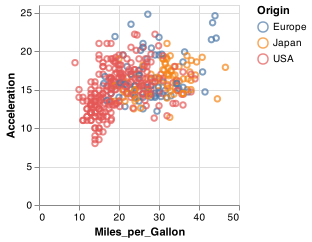

In [102]:
cars |>
@vlplot(:point, x=:Miles_per_Gallon, y=:Acceleration,color=:Origin)

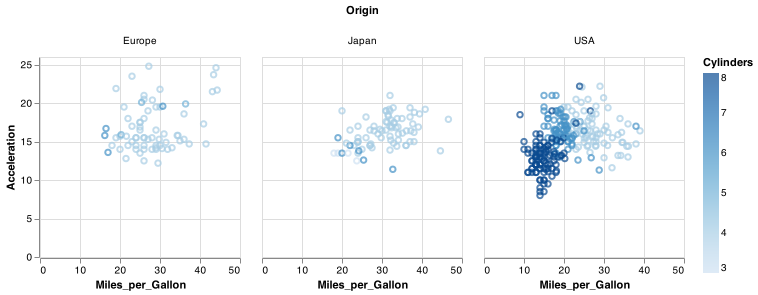

In [103]:
cars |>
@vlplot(:point, x=:Miles_per_Gallon, y=:Acceleration,column=:Origin, color =:Cylinders)

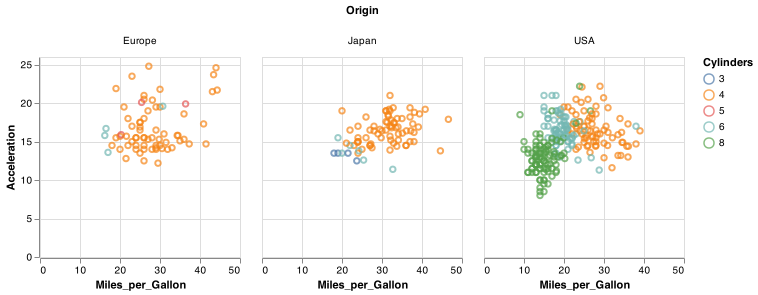

In [105]:
cars |>
@vlplot(:point, x=:Miles_per_Gallon, y=:Acceleration,column=:Origin, color ="Cylinders:n")

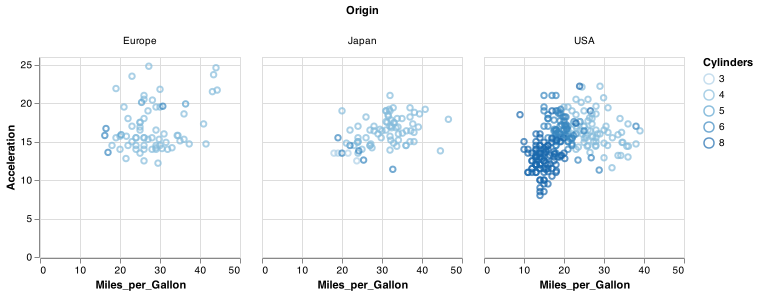

In [106]:
cars |>
@vlplot(:point, x=:Miles_per_Gallon, y=:Acceleration,column=:Origin, color ="Cylinders:o")

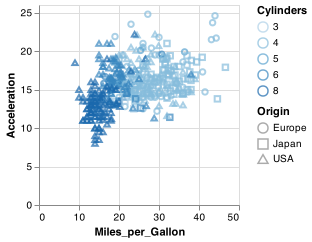

In [107]:
cars |>
@vlplot(:point, x=:Miles_per_Gallon, y=:Acceleration,shape=:Origin, color ="Cylinders:o")

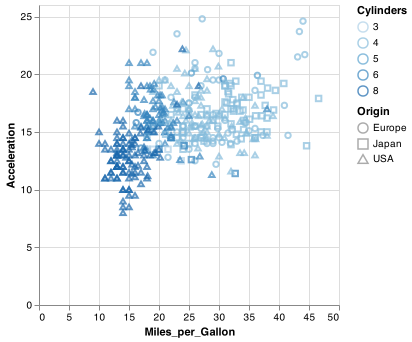

In [108]:
cars |>
@vlplot(:point, x=:Miles_per_Gallon, y=:Acceleration,shape=:Origin, color ="Cylinders:o",height=300,width = 300)

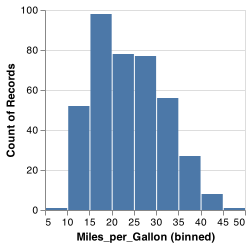

In [109]:
cars |>
    @vlplot(:bar, x={:Miles_per_Gallon, bin=true}, y= "count()")

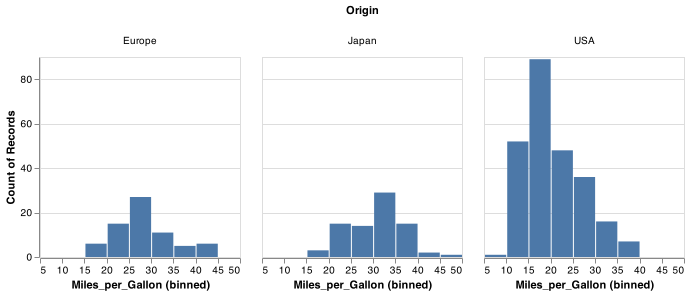

In [110]:
cars |>
    @vlplot(:bar, x={:Miles_per_Gallon, bin=true}, y= "count()",column =:Origin)

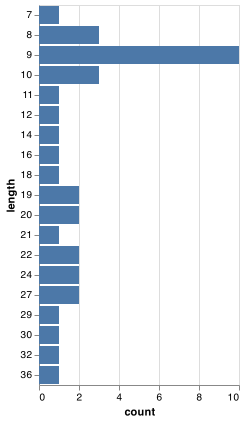

In [138]:
readdir() |>
    @groupby(length(_)) |>
    @map({length=key(_),count=length(_)}) |>
    @vlplot(:bar, x=:count, y="length:o")

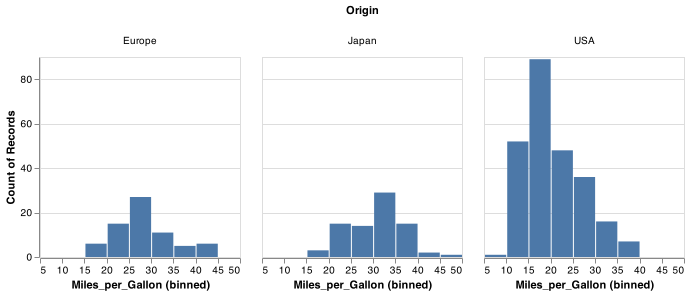

In [112]:
p = cars |>
    @vlplot(:bar, x={:Miles_per_Gallon, bin=true}, y= "count()",column =:Origin)

In [113]:
typeof(p)

VegaLite.VLSpec

In [114]:
p |> save("foo.png")

In [139]:
# import Pkg; Pkg.add("ImageMagick")

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %Fetching: [======>                                  ]  12.7 %Fetching: [======>                                  ]  14.0 %>                             ]  27.3 %                  ]  54.0 %2 %>            ]  67.6 % [=================================>       ]  81.0 %  ]  94.2 %Fetching: [=======================================> ]  96.2 %

  Resolving package versions...
  Installed Zstd_jll ──────── v1.4.5+0
  Installed Libtiff_jll ───── v4.1.0+0
  Installed libpng_jll ────── v1.6.37+3
  Installed PaddedViews ───── v0.5.5
  Installed MosaicViews ───── v0.2.2
  Installed ImageMagick ───── v1.1.5
  Installed ImageCore ─────── v0.8.14
  Installed Graphics ──────── v1.0.2
  Installed MappedArrays ──── v0.2.2
  Installed ImageMagick_jll ─ v6.9.10-12+3
  Installed JpegTurbo_jll ─── v2.0.1+1
######################################################################### 100.3%#=#=-#  #                                                                      0%
######################################################################### 100.0%##O=#  #                                                                       
######################################################################### 100.0%##O=#  #                                                                       
###############################################################

In [143]:
#doesn't work
p |> save("foo.eps")

All errors:
MethodError: no method matching iterate(::VegaLite.VLSpec)
Closest candidates are:
  iterate(::Core.SimpleVector) at essentials.jl:603
  iterate(::Core.SimpleVector, ::Any) at essentials.jl:603
  iterate(::ExponentialBackOff) at error.jl:253
  ...
ArgumentError: Argument does not support conversion to eps.


┌ Warning: Mapping to the storage type failed; perhaps your data had out-of-range values?
│ Try `map(clamp01nan, img)` to clamp values to a valid range.
└ @ ImageMagick /Users/taisei/.julia/packages/ImageMagick/Cq1Ef/src/ImageMagick.jl:180
Errors encountered while saving "foo.eps".

Fatal error:


MethodError: MethodError: no method matching iterate(::VegaLite.VLSpec)
Closest candidates are:
  iterate(!Matched::Core.SimpleVector) at essentials.jl:603
  iterate(!Matched::Core.SimpleVector, !Matched::Any) at essentials.jl:603
  iterate(!Matched::ExponentialBackOff) at error.jl:253
  ...

In [116]:
p |> save("foo.vegalite")

In [117]:
v = cars |> Voyager()

Voyager(Electron.Window(Application(Base.PipeEndpoint(RawFD(0x0000003b) paused, 0 bytes waiting), Process(`/Users/taisei/.julia/artifacts/8dcb05674719648a37669520bc9a6ef8773032f2/Julia.app/Contents/MacOS/Julia /Users/taisei/.julia/packages/Electron/MNI24/src/main.js /var/folders/xl/4ggvjmlj02b_hjhck0z8f_zh0000gn/T/jlel-eb528992cec011ea2a418dfa1c37a619 /var/folders/xl/4ggvjmlj02b_hjhck0z8f_zh0000gn/T/jlel-sn-eb52a6a4cec011ea0d1723e0d18f4f79 XrcTHxutA515S2RphUKh8UOMwncRB4kUND2lU16m4YVCkxjAGsrA5JQsgxr6tDc1PHqCdwojCnXgB5XEnfXTbRl+7gQdrM9g6/GYvu8nSLmXH0w/5YQmQligToGJSnBiKXjpre6G4GDi9uwROxtr8mKjxjff+FLAyeZVLIUD4ek=`, ProcessRunning), [3 windows]), 3, true, Channel{Any}(sz_max:128,sz_curr:0)))

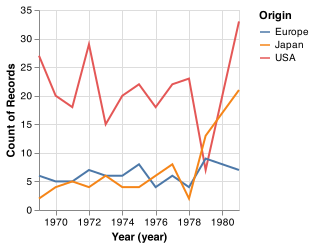

In [118]:
v[]

In [119]:
typeof(v[])

VegaLite.VLSpec

In [120]:
v[] |> save("foo2.pdf")

In [121]:
v[] |> save("foo.vegalite")

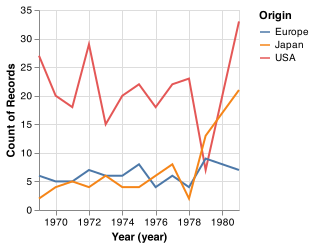

In [122]:
load("foo.vegalite")

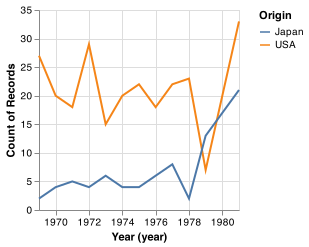

In [123]:
cars |>
@filter(_.Origin in ("USA", "Japan")) |>
load("foo.vegalite")